In [1]:
!pip install librosa

In [2]:
import os
import librosa
import librosa.display
import IPython
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import os, glob, pickle

# Load audio file

In [3]:
file1 = 'WAV_16000/Segmented/_dI--eQ6qVU_1.wav'

In [4]:
file2 = 'WAV_16000/Segmented/03bSnISJMiM_1.wav'

In [5]:
file3 = 'WAV_16000/Segmented/03bSnISJMiM_10.wav'

In [6]:
ipd.Audio(file1)

In [7]:
ipd.Audio(file2)

In [8]:
scl1, sr1 = librosa.load(file1)

In [9]:
scl2, sr2 = librosa.load(file2)

In [10]:
scl3, sr3 = librosa.load(file3)

# Plot Spectrogram

In [11]:
frame_size = 2048
hop_size = 512

In [12]:
scale = librosa.stft(scl1,n_fft=frame_size,hop_length = hop_size)

In [13]:
Y_scale = np.abs(scale) **2

In [14]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

/Users/apple/.pyenv/versions/3.8.6/envs/backintheussr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/apple/.pyenv/versions/3.8.6/envs/backintheussr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/apple/.pyenv/versions/3.8.6/envs/backintheussr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


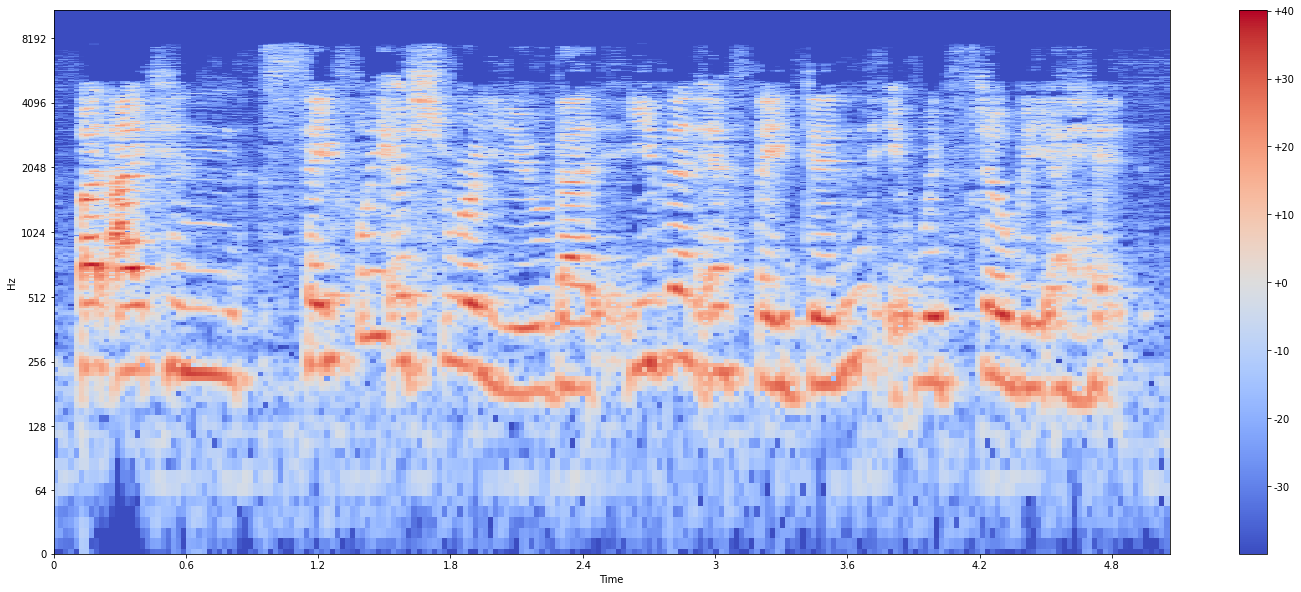

In [15]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr1, hop_size, y_axis="log");

# Extract acoustic features

In [34]:
mfcc1 = librosa.feature.mfcc(y=scl1, sr=sr1, n_mfcc=40)

In [35]:
mfcc1.shape

(40, 218)

In [49]:
stft=np.abs(librosa.stft(scl1))
chroma1 = librosa.feature.chroma_stft(S=stft, sr=sr1)

In [50]:
chroma1.shape

(12, 218)

In [52]:
mel1 = librosa.feature.melspectrogram(scl1, sr=sr1)

In [53]:
mel1.shape

(128, 218)

In [54]:
cent1 = librosa.feature.spectral_centroid(y=scl1, sr=sr1)

In [55]:
cent1.shape

(1, 218)

In [40]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel, centroid, tonnetz):
    y, sr = librosa.load(file_name)
    if chroma:
        stft=np.abs(librosa.stft(y))
        result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(y, sr=sr).T,axis=0)
        result=np.hstack((result, mel))
    if centroid: 
        cent=np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T, axis=0)
        result=np.hstack((result,cent))
    if tonnetz:
        ton = np.mean(librosa.feature.tonnetz(y=y, sr=sr).T, axis=0)
        result=np.hstack((result,ton))
    return result

In [41]:
def load_data(test_size=0.2):
    X=[]
#     y=[]
    for file in glob.glob("WAV_test/*.wav"):
        file_name=os.path.basename(file)
#         emotion=emotions[file_name.split("-")[2]]
#         if emotion not in observed_emotions:
#             continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True,centroid=True, tonnetz=True)
        X.append(feature)
#         y.append(emotion)
    return X

In [42]:
features = load_data()

In [44]:
import pandas as pd

In [45]:
features = pd.DataFrame(features)

In [47]:
features

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
0,-332.028595,129.255722,-31.939901,37.427120,-20.070017,5.273252,-3.758678,-14.119368,-10.883656,-1.465251,...,5.933466e-07,5.491711e-07,5.138567e-07,4.847721e-07,4.611237e-07,4.425943e-07,4.282575e-07,4.182827e-07,4.120324e-07,1660.008478
1,-329.172394,116.765953,-22.326614,33.327076,-28.651133,-0.818240,3.458617,-15.310377,-11.004068,-2.797800,...,5.144270e-09,5.151408e-09,5.141115e-09,5.114399e-09,5.079251e-09,5.045396e-09,5.012362e-09,4.988520e-09,4.970655e-09,1736.380858
2,-297.345551,118.200081,-42.601078,35.784111,-24.403097,5.518277,3.701921,-9.945955,-9.888802,-3.496829,...,3.076370e-08,2.950738e-08,2.841646e-08,2.743700e-08,2.658464e-08,2.588663e-08,2.532255e-08,2.492316e-08,2.466393e-08,1826.914634
3,-280.858948,130.603958,-55.131786,38.863922,-17.181208,-12.097264,-4.472122,-23.986622,-7.148187,-7.010865,...,2.189568e-10,1.873888e-10,1.649498e-10,1.481624e-10,1.354577e-10,1.259639e-10,1.189364e-10,1.141389e-10,1.112329e-10,1587.558964
4,-309.276306,123.362671,-48.842686,37.076500,-18.237160,4.865083,-4.018419,-11.548788,-6.798039,-2.343828,...,2.023162e-07,2.129828e-07,2.174335e-07,2.181702e-07,2.169877e-07,2.151279e-07,2.130366e-07,2.113576e-07,2.101171e-07,1851.480353
5,-314.268097,118.597328,-36.671223,43.725277,-17.070932,6.628833,-8.234632,-14.913377,-10.503695,-6.363477,...,3.897119e-08,3.213557e-08,2.724798e-08,2.364828e-08,2.098434e-08,1.903532e-08,1.762672e-08,1.667874e-08,1.611535e-08,1888.614083
6,-316.080780,108.475182,-44.004776,25.881392,-25.070011,3.520020,-3.152269,-5.570268,-5.890932,-2.988477,...,9.435831e-08,8.776900e-08,8.243109e-08,7.797996e-08,7.433039e-08,7.145314e-08,6.921605e-08,6.765040e-08,6.666831e-08,2021.823827
7,-311.274170,106.537628,-38.559402,44.712856,-14.580258,-3.307953,-9.272009,-13.036324,-5.403506,-6.275488,...,2.620174e-07,2.428354e-07,2.275311e-07,2.149391e-07,2.046927e-07,1.966601e-07,1.904388e-07,1.861052e-07,1.833863e-07,1910.684975
8,-308.492035,112.790703,-48.497684,43.311306,-23.042990,-4.252344,-10.232766,-11.185279,-1.737529,-6.856029,...,1.013497e-09,9.581979e-10,9.103709e-10,8.684730e-10,8.328898e-10,8.042140e-10,7.815190e-10,7.655147e-10,7.553509e-10,1984.386378
9,-367.684387,105.734589,-16.108505,41.729843,-15.272393,3.444578,-1.484412,-5.391433,-7.198677,-6.923662,...,1.572908e-08,1.464349e-08,1.379103e-08,1.309268e-08,1.252598e-08,1.208332e-08,1.173940e-08,1.150118e-08,1.135027e-08,1865.021854


In [46]:
features.shape

(28, 181)

In [ ]:
#DataFlair - Load the data and extract features for each sound file
# def load_data(test_size=0.2):
#     x,y=[],[]
#     for file in glob.glob("D:\\DataFlair\\ravdess data\\Actor_*\\*.wav"):
#         file_name=os.path.basename(file)
#         emotion=emotions[file_name.split("-")[2]]
#         if emotion not in observed_emotions:
#             continue
#         feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
#         x.append(feature)
#         y.append(emotion)
#     return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

# Sound duration

In [ ]:
inputdir= "../raw_data/testing/"

duration = []
for wav in os.listdir(inputdir):
    y, sr = librosa.load(f'../raw_data/testing/{wav}')
    duration.append(librosa.get_duration(y,sr))   

sns.histplot(duration)